Лабораторная работа 0.
1.	Установить  и необходимые библиотеки (Jupyter, PyTorch, NumPy, Matplotlib).
2.	Запустить Jupyter Notebook для выполнения кода.
3.	Изучить базовые операции с тензорами, включая создание, сложение, транспонирование и умножение матриц.
4.	Рассмотреть, как PyTorch автоматизирует расчет градиентов.


#Tensors

In [ ]:
pip install jupyter numpy matplotlib torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38

In [ ]:
import torch

# Создание тензоров
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Сложение
c = torch.add(a, b)
print("Сложение:\n", c)

# Транспонирование
a_transposed = a.T
print("Транспонированная a:\n", a_transposed)

# Умножение матриц
matmul = torch.mm(a, b)
print("Умножение матриц:\n", matmul)

# Поэлементное умножение
elementwise = a * b
print("Поэлементное умножение:\n", elementwise)

Сложение:
 tensor([[ 6,  8],
        [10, 12]])
Транспонированная a:
 tensor([[1, 3],
        [2, 4]])
Умножение матриц:
 tensor([[19, 22],
        [43, 50]])
Поэлементное умножение:
 tensor([[ 5, 12],
        [21, 32]])


In [ ]:
# Создаем тензор с отслеживанием градиентов
x = torch.tensor(3.0, requires_grad=True)

# Функция y = x^2
y = x ** 2

# Вычисляем градиенты
y.backward()

# Градиент dy/dx
print("Градиент dy/dx при x=3:", x.grad)

Градиент dy/dx при x=3: tensor(6.)


In [ ]:
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(5.0, requires_grad=True)
z = a**3 + b**2
z.backward()
print("Градиент dz/da:", a.grad)
print("Градиент dz/db:", b.grad)

Градиент dz/da: tensor(12.)
Градиент dz/db: tensor(10.)


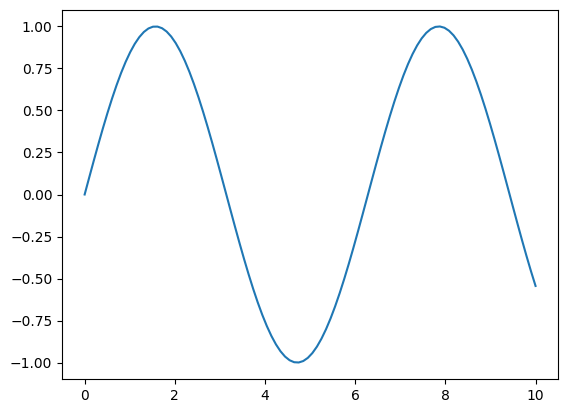

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

x = torch.linspace(0, 10, 100)
y = torch.sin(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

# Лабораторная работа 1: Классификация изображений с использованием CNN, предобработка и аугментация на различных датасетах, анализ метрик

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [ ]:
from torchvision import datasets, transforms

transform_cifar = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_fmnist = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_svhn = transforms.Compose([
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

cifar10_train = datasets.CIFAR10(root='data', train=True, transform=transform_cifar, download=True)
fmnist_train = datasets.FashionMNIST(root='data', train=True, transform=transform_fmnist, download=True)
svhn_train = datasets.SVHN(root='data', split='train', transform=transform_svhn, download=True)


100%|██████████| 170M/170M [00:10<00:00, 16.1MB/s]
100%|██████████| 26.4M/26.4M [00:03<00:00, 8.28MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 125kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.30MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.1MB/s]
100%|██████████| 182M/182M [00:24<00:00, 7.32MB/s]


In [ ]:
# Трансформации для нормализации изображений
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Загрузка тренировочного и тестового наборов данных
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Создание загрузчиков данных
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # 64 каналов на выходе после второго пулинга
        self.fc2 = nn.Linear(128, 10)          # 10 классов для CIFAR-10
        self.dropout = nn.Dropout(p=0.5)
        self.batch_norm = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(self.batch_norm(torch.relu(self.conv2(x))))
        x = x.view(-1, 64 * 8 * 8)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    print(f"Эпоха {epoch+1}/{num_epochs}, Потеря на обучении: {train_losses[-1]:.4f}")

    # Оценка на тестовых данных
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовом наборе: {accuracy:.2f}%")


Эпоха 1/10, Потеря на обучении: 1.4537
Точность на тестовом наборе: 60.92%
Эпоха 2/10, Потеря на обучении: 1.1168
Точность на тестовом наборе: 67.89%
Эпоха 3/10, Потеря на обучении: 0.9762
Точность на тестовом наборе: 70.11%
Эпоха 4/10, Потеря на обучении: 0.8820
Точность на тестовом наборе: 71.78%
Эпоха 5/10, Потеря на обучении: 0.8071
Точность на тестовом наборе: 72.76%
Эпоха 6/10, Потеря на обучении: 0.7429
Точность на тестовом наборе: 72.66%
Эпоха 7/10, Потеря на обучении: 0.6905
Точность на тестовом наборе: 73.58%
Эпоха 8/10, Потеря на обучении: 0.6468
Точность на тестовом наборе: 74.09%
Эпоха 9/10, Потеря на обучении: 0.6028
Точность на тестовом наборе: 74.17%
Эпоха 10/10, Потеря на обучении: 0.5692
Точность на тестовом наборе: 74.87%


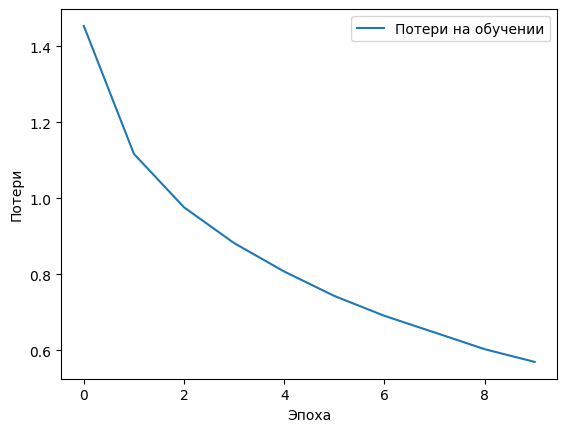

In [ ]:
plt.plot(train_losses, label='Потери на обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()


Оптимизация 1

In [ ]:
import torch.nn as nn

# Слой с фильтром 3x3 и 16 каналами
conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
# Слой с фильтром 5x5 и 32 каналами
conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Слой с фильтром 3x3 и 16 каналами
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        # Слой с фильтром 5x5 и 32 каналами
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  # 64 каналов на выходе после второго пулинга
        self.fc2 = nn.Linear(128, 10)          # 10 классов для CIFAR-10
        self.dropout = nn.Dropout(p=0.5)
        self.batch_norm = nn.BatchNorm2d(32)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(self.batch_norm(torch.relu(self.conv2(x))))
        x = x.view(-1, 32 * 8 * 8)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    print(f"Эпоха {epoch+1}/{num_epochs}, Потеря на обучении: {train_losses[-1]:.4f}")

    # Оценка на тестовых данных
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовом наборе: {accuracy:.2f}%")

Эпоха 1/10, Потеря на обучении: 1.4449
Точность на тестовом наборе: 58.90%
Эпоха 2/10, Потеря на обучении: 1.1105
Точность на тестовом наборе: 66.26%
Эпоха 3/10, Потеря на обучении: 0.9925
Точность на тестовом наборе: 69.14%
Эпоха 4/10, Потеря на обучении: 0.9055
Точность на тестовом наборе: 70.68%
Эпоха 5/10, Потеря на обучении: 0.8454
Точность на тестовом наборе: 70.10%
Эпоха 6/10, Потеря на обучении: 0.7885
Точность на тестовом наборе: 71.23%
Эпоха 7/10, Потеря на обучении: 0.7432
Точность на тестовом наборе: 72.54%
Эпоха 8/10, Потеря на обучении: 0.7014
Точность на тестовом наборе: 72.41%
Эпоха 9/10, Потеря на обучении: 0.6720
Точность на тестовом наборе: 72.99%
Эпоха 10/10, Потеря на обучении: 0.6324
Точность на тестовом наборе: 72.33%


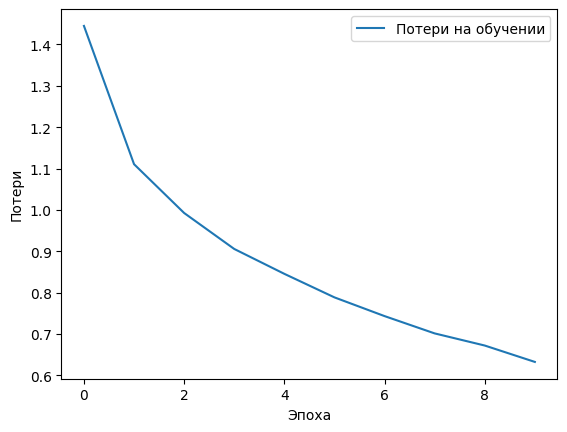

In [ ]:
plt.plot(train_losses, label='Потери на обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()


Увеличение числа фильтров (64 и 128) для более сложных признаков

In [ ]:
# Слой с фильтром 3x3 и 64 каналами
conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
# Слой с фильтром 5x5 и 128 каналами
conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2)


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Слой с фильтром 3x3 и 64 каналами
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        # Слой с фильтром 5x5 и 128 каналами
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2)

        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 256)  # 64 каналов на выходе после второго пулинга
        self.fc2 = nn.Linear(256, 10)          # 10 классов для CIFAR-10
        self.dropout = nn.Dropout(p=0.5)
        self.batch_norm = nn.BatchNorm2d(128)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(self.batch_norm(torch.relu(self.conv2(x))))
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    print(f"Эпоха {epoch+1}/{num_epochs}, Потеря на обучении: {train_losses[-1]:.4f}")

    # Оценка на тестовых данных
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовом наборе: {accuracy:.2f}%")

Эпоха 1/10, Потеря на обучении: 1.5096
Точность на тестовом наборе: 61.33%
Эпоха 2/10, Потеря на обучении: 1.1177
Точность на тестовом наборе: 68.25%
Эпоха 3/10, Потеря на обучении: 0.9569
Точность на тестовом наборе: 72.00%
Эпоха 4/10, Потеря на обучении: 0.8504
Точность на тестовом наборе: 73.48%
Эпоха 5/10, Потеря на обучении: 0.7611
Точность на тестовом наборе: 74.56%
Эпоха 6/10, Потеря на обучении: 0.6771
Точность на тестовом наборе: 75.36%
Эпоха 7/10, Потеря на обучении: 0.6214
Точность на тестовом наборе: 75.95%
Эпоха 8/10, Потеря на обучении: 0.5499
Точность на тестовом наборе: 75.99%
Эпоха 9/10, Потеря на обучении: 0.4977
Точность на тестовом наборе: 76.56%
Эпоха 10/10, Потеря на обучении: 0.4442
Точность на тестовом наборе: 76.98%


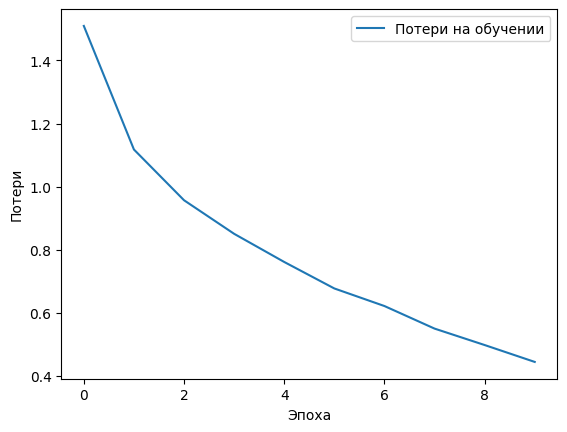

In [ ]:
plt.plot(train_losses, label='Потери на обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

Использование фильтров с ядрами 7x7 и большим числом каналов для очень сложных признаков

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Основной сверточный слой
        self.conv = nn.Conv2d(in_channels=3, out_channels=256, kernel_size=7, padding=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.batch_norm = nn.BatchNorm2d(256)

        # Полносвязные слои (размеры пересчитаны)
        self.fc1 = nn.Linear(256 * 16 * 16, 512)  # 256 каналов * 16x16 после одного пулинга
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # Проход через сверточный слой
        x = torch.relu(self.conv(x))
        x = self.batch_norm(x)
        x = self.pool(x)

        # Выравнивание для полносвязных слоев
        x = x.view(-1, 256 * 16 * 16)

        # Полносвязные слои
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Инициализация модели
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    print(f"Эпоха {epoch+1}/{num_epochs}, Потеря на обучении: {train_losses[-1]:.4f}")

    # Оценка на тестовых данных
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовом наборе: {accuracy:.2f}%")

Эпоха 1/10, Потеря на обучении: 1.9441
Точность на тестовом наборе: 48.74%
Эпоха 2/10, Потеря на обучении: 1.4935
Точность на тестовом наборе: 54.97%
Эпоха 3/10, Потеря на обучении: 1.3385
Точность на тестовом наборе: 59.86%
Эпоха 4/10, Потеря на обучении: 1.2284
Точность на тестовом наборе: 62.97%
Эпоха 5/10, Потеря на обучении: 1.1405
Точность на тестовом наборе: 63.65%
Эпоха 6/10, Потеря на обучении: 1.0713
Точность на тестовом наборе: 63.98%
Эпоха 7/10, Потеря на обучении: 1.0099
Точность на тестовом наборе: 64.67%
Эпоха 8/10, Потеря на обучении: 0.9568
Точность на тестовом наборе: 65.60%
Эпоха 9/10, Потеря на обучении: 0.9076
Точность на тестовом наборе: 66.31%
Эпоха 10/10, Потеря на обучении: 0.8579
Точность на тестовом наборе: 66.19%


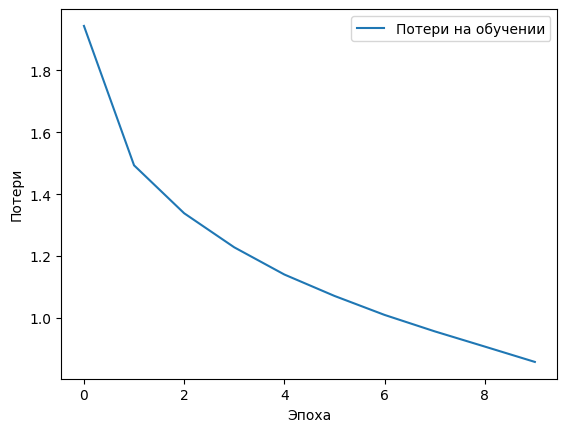

In [ ]:
plt.plot(train_losses, label='Потери на обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

2. Пулинг слои

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Слой с фильтром 3x3 и 64 каналами
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        # Слой с фильтром 5x5 и 128 каналами
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 8 * 8, 256)  # 64 каналов на выходе после второго пулинга
        self.fc2 = nn.Linear(256, 10)          # 10 классов для CIFAR-10
        self.dropout = nn.Dropout(p=0.5)
        self.batch_norm = nn.BatchNorm2d(128)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(self.batch_norm(torch.relu(self.conv2(x))))
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

NameError: name 'nn' is not defined

In [ ]:
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    print(f"Эпоха {epoch+1}/{num_epochs}, Потеря на обучении: {train_losses[-1]:.4f}")

    # Оценка на тестовых данных
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовом наборе: {accuracy:.2f}%")

Эпоха 1/10, Потеря на обучении: 1.4811
Точность на тестовом наборе: 59.89%
Эпоха 2/10, Потеря на обучении: 1.1105
Точность на тестовом наборе: 66.32%
Эпоха 3/10, Потеря на обучении: 0.9326
Точность на тестовом наборе: 70.89%
Эпоха 4/10, Потеря на обучении: 0.8286
Точность на тестовом наборе: 73.30%
Эпоха 5/10, Потеря на обучении: 0.7463
Точность на тестовом наборе: 74.21%
Эпоха 6/10, Потеря на обучении: 0.6614
Точность на тестовом наборе: 75.79%
Эпоха 7/10, Потеря на обучении: 0.5987
Точность на тестовом наборе: 74.93%
Эпоха 8/10, Потеря на обучении: 0.5372
Точность на тестовом наборе: 75.16%
Эпоха 9/10, Потеря на обучении: 0.4805
Точность на тестовом наборе: 75.84%
Эпоха 10/10, Потеря на обучении: 0.4407
Точность на тестовом наборе: 76.27%


In [ ]:
plt.plot(train_losses, label='Потери на обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

Пример 2: Max Pooling с большим размером ядра (3x3) для более сильного снижения размерности

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Слой с фильтром 3x3 и 64 каналами
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        # Слой с фильтром 5x5 и 128 каналами
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=3)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=3)
        self.fc1 = nn.Linear(128 * 8 * 8, 256)  # 64 каналов на выходе после второго пулинга
        self.fc2 = nn.Linear(256, 10)          # 10 классов для CIFAR-10
        self.dropout = nn.Dropout(p=0.5)
        self.batch_norm = nn.BatchNorm2d(128)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(self.batch_norm(torch.relu(self.conv2(x))))
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Для первого пулинга
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=3)  # Для второго пулинга
        self.adaptive_pool = nn.AdaptiveAvgPool2d((6, 6))  # Фиксируем размер
        self.fc1 = nn.Linear(128 * 6 * 6, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)
        self.batch_norm = nn.BatchNorm2d(128)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))        # 32x32 -> 16x16
        x = self.maxpool(torch.relu(self.batch_norm(self.conv2(x))))  # 16x16 -> 5x5 (но мы фиксируем)
        x = self.adaptive_pool(x)                  # 5x5 -> 6x6
        x = x.view(-1, 128 * 6 * 6)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    print(f"Эпоха {epoch+1}/{num_epochs}, Потеря на обучении: {train_losses[-1]:.4f}")

    # Оценка на тестовых данных
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовом наборе: {accuracy:.2f}%")

Эпоха 1/10, Потеря на обучении: 1.6093
Точность на тестовом наборе: 52.89%
Эпоха 2/10, Потеря на обучении: 1.3198
Точность на тестовом наборе: 62.88%
Эпоха 3/10, Потеря на обучении: 1.1910
Точность на тестовом наборе: 64.23%
Эпоха 4/10, Потеря на обучении: 1.1055
Точность на тестовом наборе: 66.68%
Эпоха 5/10, Потеря на обучении: 1.0350
Точность на тестовом наборе: 70.07%
Эпоха 6/10, Потеря на обучении: 0.9796
Точность на тестовом наборе: 70.83%
Эпоха 7/10, Потеря на обучении: 0.9200
Точность на тестовом наборе: 74.00%
Эпоха 8/10, Потеря на обучении: 0.8725
Точность на тестовом наборе: 71.76%
Эпоха 9/10, Потеря на обучении: 0.8335
Точность на тестовом наборе: 75.09%
Эпоха 10/10, Потеря на обучении: 0.7970
Точность на тестовом наборе: 73.29%


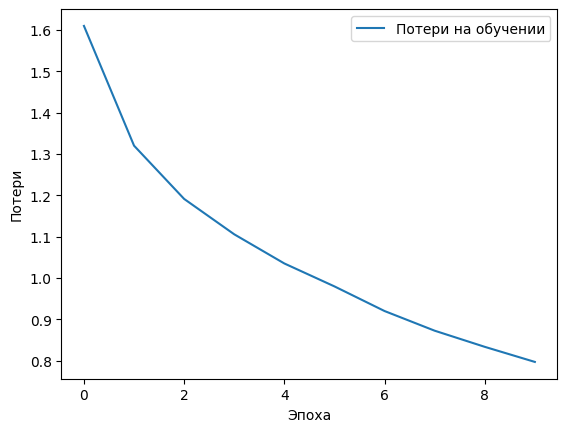

In [ ]:
plt.plot(train_losses, label='Потери на обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

Пример 3: Average Pooling для сглаживания признаков

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2)  # Используем AvgPool вместо MaxPool
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)
        self.batch_norm = nn.BatchNorm2d(128)

    def forward(self, x):
        # Размеры CIFAR-10: 3x32x32
        x = self.avgpool(torch.relu(self.conv1(x)))  # 32x32 -> 16x16
        x = self.avgpool(self.batch_norm(torch.relu(self.conv2(x))))  # 16x16 -> 8x8
        x = x.view(-1, 128 * 8 * 8)  # Преобразуем в вектор 8192 элементов
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    print(f"Эпоха {epoch+1}/{num_epochs}, Потеря на обучении: {train_losses[-1]:.4f}")

    # Оценка на тестовых данных
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовом наборе: {accuracy:.2f}%")

Эпоха 1/10, Потеря на обучении: 1.3660
Точность на тестовом наборе: 63.00%
Эпоха 2/10, Потеря на обучении: 1.0020
Точность на тестовом наборе: 69.82%
Эпоха 3/10, Потеря на обучении: 0.8401
Точность на тестовом наборе: 71.90%
Эпоха 4/10, Потеря на обучении: 0.7199
Точность на тестовом наборе: 73.20%
Эпоха 5/10, Потеря на обучении: 0.6233
Точность на тестовом наборе: 74.20%
Эпоха 6/10, Потеря на обучении: 0.5385
Точность на тестовом наборе: 75.05%
Эпоха 7/10, Потеря на обучении: 0.4691
Точность на тестовом наборе: 74.48%
Эпоха 8/10, Потеря на обучении: 0.4174
Точность на тестовом наборе: 75.53%
Эпоха 9/10, Потеря на обучении: 0.3662
Точность на тестовом наборе: 75.67%
Эпоха 10/10, Потеря на обучении: 0.3380
Точность на тестовом наборе: 75.85%


In [ ]:
plt.plot(train_losses, label='Потери на обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

3. Batch Bormalization

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.avgpool(torch.relu(self.bn1(self.conv1(x))))
        x = self.avgpool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 8 * 8)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [ ]:
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    print(f"Эпоха {epoch+1}/{num_epochs}, Потеря на обучении: {train_losses[-1]:.4f}")

    # Оценка на тестовых данных
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точность на тестовом наборе: {accuracy:.2f}%")

Эпоха 1/10, Потеря на обучении: 1.5369
Точность на тестовом наборе: 57.47%
Эпоха 2/10, Потеря на обучении: 1.2371
Точность на тестовом наборе: 64.89%
Эпоха 3/10, Потеря на обучении: 1.1005
Точность на тестовом наборе: 67.91%
Эпоха 4/10, Потеря на обучении: 1.0217
Точность на тестовом наборе: 69.90%
Эпоха 5/10, Потеря на обучении: 0.9611
Точность на тестовом наборе: 70.16%
Эпоха 6/10, Потеря на обучении: 0.9141
Точность на тестовом наборе: 71.73%
Эпоха 7/10, Потеря на обучении: 0.8625
Точность на тестовом наборе: 72.97%
Эпоха 8/10, Потеря на обучении: 0.8278
Точность на тестовом наборе: 72.25%
Эпоха 9/10, Потеря на обучении: 0.7908
Точность на тестовом наборе: 74.46%
Эпоха 10/10, Потеря на обучении: 0.7606
Точность на тестовом наборе: 73.68%


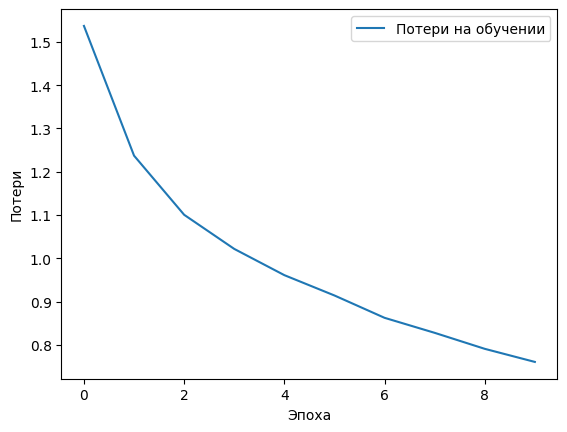

In [ ]:
plt.plot(train_losses, label='Потери на обучении')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [ ]:
conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
bn1 = nn.BatchNorm2d(32)
conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
bn2 = nn.BatchNorm2d(64)


In [ ]:
conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
bn1 = nn.BatchNorm2d(32)
conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
bn3 = nn.BatchNorm2d(128)


In [ ]:
dropout = nn.Dropout(p=0.2)

In [ ]:
dropout = nn.Dropout(p=0.5)

In [ ]:
dropout1 = nn.Dropout(p=0.3)
dropout2 = nn.Dropout(p=0.5)


In [ ]:
fc = nn.Linear(128,10)

In [ ]:
fc = nn.Linear(128, 64)

In [ ]:
fc = nn.Linear(64, 10)

In [ ]:
import matplotlib.pyplot as plt

Epoch [1/10] | Train Loss: 1.5150, Acc: 44.45% | Test Loss: 1.1158, Acc: 60.63%
Epoch [2/10] | Train Loss: 1.2269, Acc: 55.85% | Test Loss: 1.0217, Acc: 64.24%
Epoch [3/10] | Train Loss: 1.1338, Acc: 59.53% | Test Loss: 0.9664, Acc: 65.84%
Epoch [4/10] | Train Loss: 1.0677, Acc: 62.17% | Test Loss: 0.9005, Acc: 68.41%
Epoch [5/10] | Train Loss: 1.0099, Acc: 64.22% | Test Loss: 0.8748, Acc: 69.69%
Epoch [6/10] | Train Loss: 0.9663, Acc: 65.84% | Test Loss: 0.8496, Acc: 70.24%
Epoch [7/10] | Train Loss: 0.9294, Acc: 67.14% | Test Loss: 0.8310, Acc: 71.11%
Epoch [8/10] | Train Loss: 0.8906, Acc: 68.31% | Test Loss: 0.8151, Acc: 71.99%
Epoch [9/10] | Train Loss: 0.8520, Acc: 69.81% | Test Loss: 0.8141, Acc: 71.60%
Epoch [10/10] | Train Loss: 0.8237, Acc: 70.73% | Test Loss: 0.7944, Acc: 73.21%


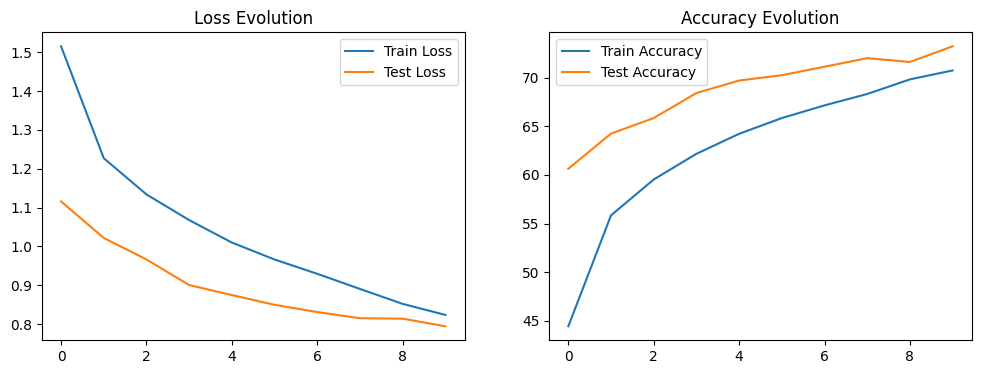

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Загрузка и подготовка данных CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_set = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
test_set = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=64,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=64,
    shuffle=False
)

# 2. Определение архитектуры CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 8 * 8)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Обучение модели
train_losses = []
test_losses = []
train_acc = []
test_acc = []

num_epochs = 10

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss/len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = 100 * correct/total
    train_acc.append(train_accuracy)

    # Validation
    model.eval()
    test_running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = test_running_loss/len(test_loader)
    test_losses.append(test_loss)
    test_accuracy = 100 * correct/total
    test_acc.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_loss:.4f}, Acc: {train_accuracy:.2f}% | "
          f"Test Loss: {test_loss:.4f}, Acc: {test_accuracy:.2f}%")

# 4. Визуализация результатов
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.title('Accuracy Evolution')
plt.legend()
plt.show()

CIFAR-10 | Augment: False | Epoch [1/15]
Train Loss: 1.3806 Acc: 50.00%
Test Loss: 1.0204 Acc: 63.80%

CIFAR-10 | Augment: False | Epoch [2/15]
Train Loss: 1.0374 Acc: 63.39%
Test Loss: 0.8877 Acc: 68.80%

CIFAR-10 | Augment: False | Epoch [3/15]
Train Loss: 0.9093 Acc: 68.24%
Test Loss: 0.7722 Acc: 73.13%

CIFAR-10 | Augment: False | Epoch [4/15]
Train Loss: 0.8200 Acc: 71.46%
Test Loss: 0.7330 Acc: 74.70%

CIFAR-10 | Augment: False | Epoch [5/15]
Train Loss: 0.7513 Acc: 73.89%
Test Loss: 0.7165 Acc: 75.18%

CIFAR-10 | Augment: False | Epoch [6/15]
Train Loss: 0.6878 Acc: 76.04%
Test Loss: 0.6774 Acc: 76.85%

CIFAR-10 | Augment: False | Epoch [7/15]
Train Loss: 0.6340 Acc: 77.95%
Test Loss: 0.6539 Acc: 77.61%

CIFAR-10 | Augment: False | Epoch [8/15]
Train Loss: 0.5801 Acc: 79.76%
Test Loss: 0.6410 Acc: 77.93%

CIFAR-10 | Augment: False | Epoch [9/15]
Train Loss: 0.5450 Acc: 80.81%
Test Loss: 0.6435 Acc: 78.01%

CIFAR-10 | Augment: False | Epoch [10/15]
Train Loss: 0.4963 Acc: 82.73%


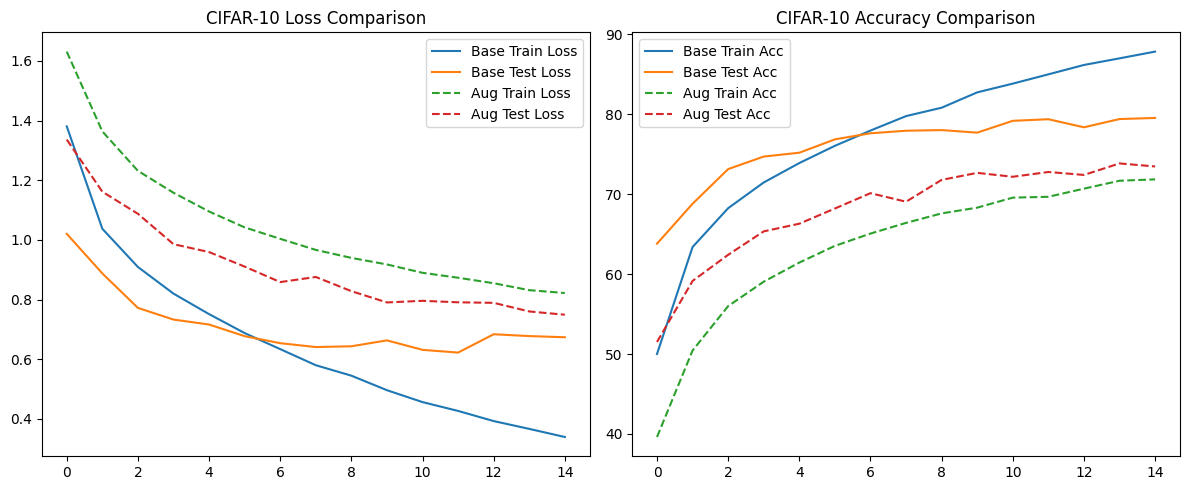

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x1152 and 2048x256)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import SVHN

# Конфигурация устройств
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Функция для загрузки данных с аугментацией
def load_dataset(dataset_name, augment=False):
    basic_transforms = [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)) if dataset_name == 'Fashion-MNIST'
        else transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]

    if augment:
        augment_transforms = [
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))
        ] if dataset_name != 'Fashion-MNIST' else [
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))
        ]
        transform = transforms.Compose(augment_transforms + basic_transforms)
    else:
        transform = transforms.Compose(basic_transforms)

    # Загрузка датасетов
    if dataset_name == 'CIFAR-10':
        trainset = torchvision.datasets.CIFAR10(
            root='./data', train=True, download=True, transform=transform)
        testset = torchvision.datasets.CIFAR10(
            root='./data', train=False, download=True, transform=transform)
    elif dataset_name == 'Fashion-MNIST':
        trainset = torchvision.datasets.FashionMNIST(
            root='./data', train=True, download=True, transform=transform)
        testset = torchvision.datasets.FashionMNIST(
            root='./data', train=False, download=True, transform=transform)
    elif dataset_name == 'SVHN':
        trainset = SVHN(
            root='./data', split='train', download=True, transform=transform)
        testset = SVHN(
            root='./data', split='test', download=True, transform=transform)

    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=64, shuffle=True)
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=64, shuffle=False)

    return trainloader, testloader

# 2. Архитектура модели
class EnhancedCNN(nn.Module):
    def __init__(self, in_channels=3):
        super(EnhancedCNN, self).__init__()

        # Сверточные слои
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # Автоматический расчет размера входного слоя
        self._init_fc(in_channels)

    def _init_fc(self, in_channels):
        # Пробный проход для определения размера
        x = torch.randn(1, in_channels, 32, 32)  # Стандартный размер для CIFAR-10/SVHN
        with torch.no_grad():
            x = self.conv_layers(x)
        flattened_size = x.view(1, -1).size(1)

        # Полносвязные слои
        self.fc_layers = nn.Sequential(
            nn.Linear(flattened_size, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10))

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Автоматическое выравнивание
        x = self.fc_layers(x)
        return x
# 3. Функция обучения
def train_model(dataset_name, augment=False):
    train_loader, test_loader = load_dataset(dataset_name, augment)

    model = EnhancedCNN(in_channels=1 if dataset_name == 'Fashion-MNIST' else 3)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 15
    results = {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': []}

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)

        # Validation phase
        model.eval()
        test_running_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                test_running_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        test_loss = test_running_loss / len(test_loader)
        test_acc = 100 * correct / total
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

        print(f"{dataset_name} | Augment: {augment} | Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {train_loss:.4f} Acc: {train_acc:.2f}%")
        print(f"Test Loss: {test_loss:.4f} Acc: {test_acc:.2f}%\n")

    return results

# 4. Запуск экспериментов и визуализация
datasets = ['CIFAR-10', 'Fashion-MNIST', 'SVHN']
results = {}

for dataset in datasets:
    # Обучение без аугментации
    results[f"{dataset}_base"] = train_model(dataset, augment=False)

    # Обучение с аугментацией
    results[f"{dataset}_aug"] = train_model(dataset, augment=True)

    # Визуализация результатов
    plt.figure(figsize=(12,5))

    # График потерь
    plt.subplot(1,2,1)
    plt.plot(results[f"{dataset}_base"]['train_loss'], label='Base Train Loss')
    plt.plot(results[f"{dataset}_base"]['test_loss'], label='Base Test Loss')
    plt.plot(results[f"{dataset}_aug"]['train_loss'], '--', label='Aug Train Loss')
    plt.plot(results[f"{dataset}_aug"]['test_loss'], '--', label='Aug Test Loss')
    plt.title(f'{dataset} Loss Comparison')
    plt.legend()

    # График точности
    plt.subplot(1,2,2)
    plt.plot(results[f"{dataset}_base"]['train_acc'], label='Base Train Acc')
    plt.plot(results[f"{dataset}_base"]['test_acc'], label='Base Test Acc')
    plt.plot(results[f"{dataset}_aug"]['train_acc'], '--', label='Aug Train Acc')
    plt.plot(results[f"{dataset}_aug"]['test_acc'], '--', label='Aug Test Acc')
    plt.title(f'{dataset} Accuracy Comparison')
    plt.legend()

    plt.tight_layout()
    plt.show()

Fashion-MNIST | Augment: False | Epoch [1/15]
Train Loss: 0.4341 Acc: 84.18%
Test Loss: 0.3050 Acc: 88.77%

Fashion-MNIST | Augment: False | Epoch [2/15]
Train Loss: 0.3001 Acc: 89.08%
Test Loss: 0.2768 Acc: 89.96%

Fashion-MNIST | Augment: False | Epoch [3/15]
Train Loss: 0.2619 Acc: 90.42%
Test Loss: 0.2586 Acc: 90.24%

Fashion-MNIST | Augment: False | Epoch [4/15]
Train Loss: 0.2331 Acc: 91.41%
Test Loss: 0.2340 Acc: 91.51%

Fashion-MNIST | Augment: False | Epoch [5/15]
Train Loss: 0.2139 Acc: 92.25%
Test Loss: 0.2414 Acc: 91.47%

Fashion-MNIST | Augment: False | Epoch [6/15]
Train Loss: 0.1956 Acc: 92.78%
Test Loss: 0.2374 Acc: 91.67%

Fashion-MNIST | Augment: False | Epoch [7/15]
Train Loss: 0.1828 Acc: 93.31%
Test Loss: 0.2242 Acc: 91.96%

Fashion-MNIST | Augment: False | Epoch [8/15]
Train Loss: 0.1665 Acc: 93.87%
Test Loss: 0.2088 Acc: 92.44%

Fashion-MNIST | Augment: False | Epoch [9/15]
Train Loss: 0.1550 Acc: 94.16%
Test Loss: 0.2310 Acc: 92.14%

Fashion-MNIST | Augment: Fal

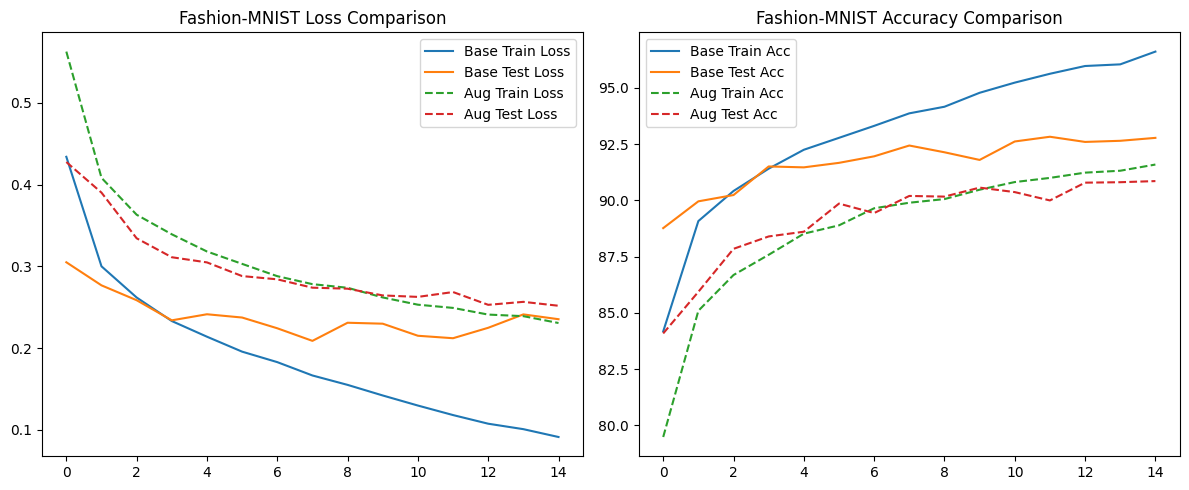

100%|██████████| 64.3M/64.3M [00:16<00:00, 3.81MB/s]


SVHN | Augment: False | Epoch [1/15]
Train Loss: 0.8175 Acc: 74.15%
Test Loss: 0.4470 Acc: 86.37%

SVHN | Augment: False | Epoch [2/15]
Train Loss: 0.4921 Acc: 85.43%
Test Loss: 0.3888 Acc: 88.60%

SVHN | Augment: False | Epoch [3/15]
Train Loss: 0.4149 Acc: 87.73%
Test Loss: 0.3379 Acc: 90.21%

SVHN | Augment: False | Epoch [4/15]
Train Loss: 0.3737 Acc: 89.12%
Test Loss: 0.3221 Acc: 90.63%

SVHN | Augment: False | Epoch [5/15]
Train Loss: 0.3413 Acc: 90.10%
Test Loss: 0.2879 Acc: 91.85%

SVHN | Augment: False | Epoch [6/15]
Train Loss: 0.3098 Acc: 91.07%
Test Loss: 0.2763 Acc: 92.34%

SVHN | Augment: False | Epoch [7/15]
Train Loss: 0.2864 Acc: 91.91%
Test Loss: 0.2871 Acc: 92.14%

SVHN | Augment: False | Epoch [8/15]
Train Loss: 0.2614 Acc: 92.54%
Test Loss: 0.2743 Acc: 92.46%

SVHN | Augment: False | Epoch [9/15]
Train Loss: 0.2508 Acc: 92.80%
Test Loss: 0.2592 Acc: 92.86%

SVHN | Augment: False | Epoch [10/15]
Train Loss: 0.2301 Acc: 93.39%
Test Loss: 0.2565 Acc: 92.99%

SVHN | Au

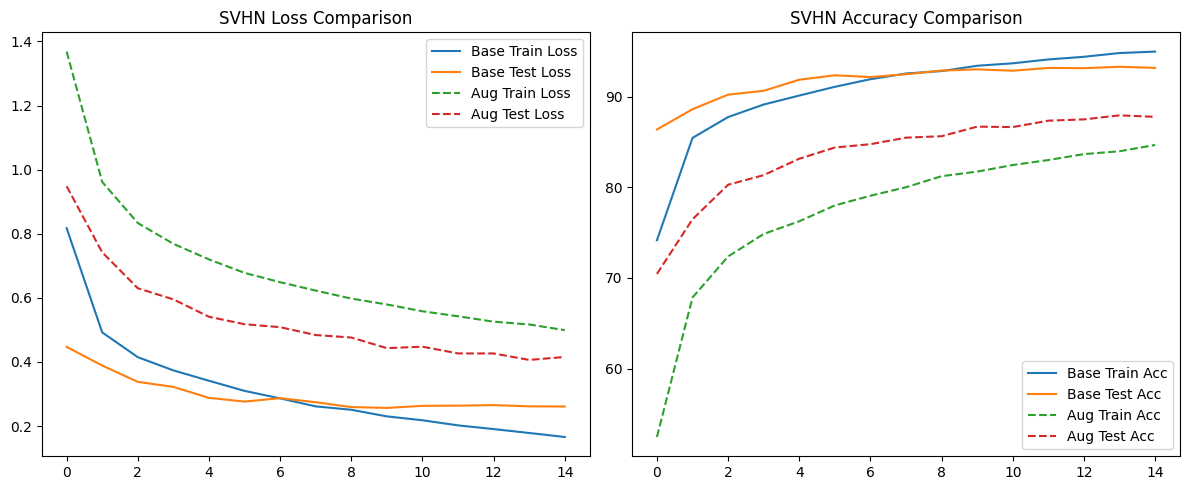

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import SVHN

# Конфигурация устройств
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Функция для загрузки данных с аугментацией
def load_dataset(dataset_name, augment=False):
    basic_transforms = [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)) if dataset_name == 'Fashion-MNIST'
        else transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]

    if augment:
        augment_transforms = [
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))
        ] if dataset_name != 'Fashion-MNIST' else [
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))
        ]
        transform = transforms.Compose(augment_transforms + basic_transforms)
    else:
        transform = transforms.Compose(basic_transforms)

    # Загрузка датасетов
    if dataset_name == 'CIFAR-10':
        trainset = torchvision.datasets.CIFAR10(
            root='./data', train=True, download=True, transform=transform)
        testset = torchvision.datasets.CIFAR10(
            root='./data', train=False, download=True, transform=transform)
    elif dataset_name == 'Fashion-MNIST':
        trainset = torchvision.datasets.FashionMNIST(
            root='./data', train=True, download=True, transform=transform)
        testset = torchvision.datasets.FashionMNIST(
            root='./data', train=False, download=True, transform=transform)
    elif dataset_name == 'SVHN':
        trainset = SVHN(
            root='./data', split='train', download=True, transform=transform)
        testset = SVHN(
            root='./data', split='test', download=True, transform=transform)

    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=64, shuffle=True)
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=64, shuffle=False)

    return trainloader, testloader

# 2. Архитектура модели
class EnhancedCNN(nn.Module):
    def __init__(self, in_channels=3, input_size=32):
        super(EnhancedCNN, self).__init__()

        # Сверточные слои с автоматическим расчетом размеров
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((4, 4))  # Фиксируем размер выхода
        )

        # Автоматический расчет входа для FC слоев
        self.fc = nn.Sequential(
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Модифицированная функция загрузки данных
def load_dataset(dataset_name, augment=False):
    # Добавляем Resize для Fashion-MNIST
    base_transforms = [transforms.Resize((32, 32))] if dataset_name == 'Fashion-MNIST' else []

    if augment:
        augment_transforms = [
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2)
        ]
        base_transforms = augment_transforms + base_transforms

    base_transforms += [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)) if dataset_name == 'Fashion-MNIST'
        else transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]

    transform = transforms.Compose(base_transforms)

    # Загрузка датасетов с учетом особенностей
    if dataset_name == 'Fashion-MNIST':
        trainset = torchvision.datasets.FashionMNIST(
            root='./data', train=True, download=True, transform=transform)
        testset = torchvision.datasets.FashionMNIST(
            root='./data', train=False, download=True, transform=transform)
    elif dataset_name == 'SVHN':
        trainset = SVHN(root='./data', split='train', download=True, transform=transform)
        testset = SVHN(root='./data', split='test', download=True, transform=transform)
    else:  # CIFAR-10
        trainset = torchvision.datasets.CIFAR10(
            root='./data', train=True, download=True, transform=transform)
        testset = torchvision.datasets.CIFAR10(
            root='./data', train=False, download=True, transform=transform)

    return DataLoader(trainset, batch_size=64, shuffle=True), DataLoader(testset, batch_size=64)

# Инициализация модели с учетом типа датасета
def create_model(dataset_name):
    in_channels = 1 if dataset_name == 'Fashion-MNIST' else 3
    return EnhancedCNN(in_channels=in_channels).to(device)
# 3. Функция обучения
def train_model(dataset_name, augment=False):
    train_loader, test_loader = load_dataset(dataset_name, augment)

    model = EnhancedCNN(in_channels=1 if dataset_name == 'Fashion-MNIST' else 3)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 15
    results = {'train_loss': [], 'test_loss': [], 'train_acc': [], 'test_acc': []}

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)

        # Validation phase
        model.eval()
        test_running_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                test_running_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        test_loss = test_running_loss / len(test_loader)
        test_acc = 100 * correct / total
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

        print(f"{dataset_name} | Augment: {augment} | Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {train_loss:.4f} Acc: {train_acc:.2f}%")
        print(f"Test Loss: {test_loss:.4f} Acc: {test_acc:.2f}%\n")

    return results

# 4. Запуск экспериментов и визуализация
datasets = ['Fashion-MNIST', 'SVHN']
results = {}

for dataset in datasets:
    # Обучение без аугментации
    results[f"{dataset}_base"] = train_model(dataset, augment=False)

    # Обучение с аугментацией
    results[f"{dataset}_aug"] = train_model(dataset, augment=True)

    # Визуализация результатов
    plt.figure(figsize=(12,5))

    # График потерь
    plt.subplot(1,2,1)
    plt.plot(results[f"{dataset}_base"]['train_loss'], label='Base Train Loss')
    plt.plot(results[f"{dataset}_base"]['test_loss'], label='Base Test Loss')
    plt.plot(results[f"{dataset}_aug"]['train_loss'], '--', label='Aug Train Loss')
    plt.plot(results[f"{dataset}_aug"]['test_loss'], '--', label='Aug Test Loss')
    plt.title(f'{dataset} Loss Comparison')
    plt.legend()

    # График точности
    plt.subplot(1,2,2)
    plt.plot(results[f"{dataset}_base"]['train_acc'], label='Base Train Acc')
    plt.plot(results[f"{dataset}_base"]['test_acc'], label='Base Test Acc')
    plt.plot(results[f"{dataset}_aug"]['train_acc'], '--', label='Aug Train Acc')
    plt.plot(results[f"{dataset}_aug"]['test_acc'], '--', label='Aug Test Acc')
    plt.title(f'{dataset} Accuracy Comparison')
    plt.legend()

    plt.tight_layout()
    plt.show()

В итоге результаты получились лучше на даннных без аугментации

Training SimpleCNN...
Training MediumCNN...
Training DeepCNN...


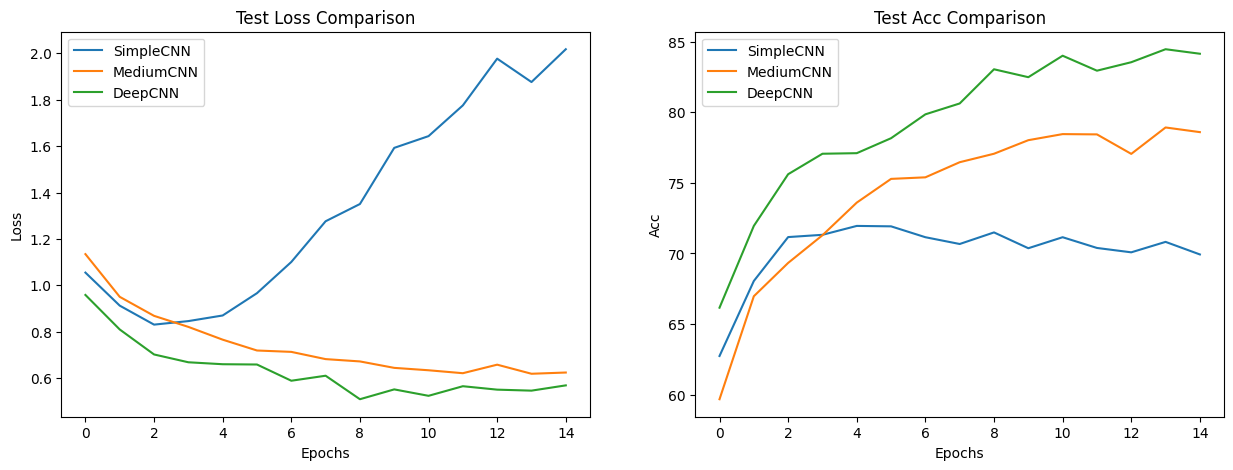

Final Metrics:
SimpleCNN:
  Accuracy: 71.95%
  Overfitting Gap: 26.92%
MediumCNN:
  Accuracy: 78.92%
  Overfitting Gap: 3.94%
DeepCNN:
  Accuracy: 84.46%
  Overfitting Gap: 9.33%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# Конфигурация устройств
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Функция для загрузки данных с аугментацией
def load_dataset(dataset_name, augment=False):
    basic_transforms = [
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)) if dataset_name == 'Fashion-MNIST'
        else transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]

    if augment:
        augment_transforms = [
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))
        ] if dataset_name != 'Fashion-MNIST' else [
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1))
        ]
        transform = transforms.Compose(augment_transforms + basic_transforms)
    else:
        transform = transforms.Compose(basic_transforms)

    # Загрузка датасетов
    if dataset_name == 'CIFAR-10':
        trainset = torchvision.datasets.CIFAR10(
            root='./data', train=True, download=True, transform=transform)
        testset = torchvision.datasets.CIFAR10(
            root='./data', train=False, download=True, transform=transform)
    elif dataset_name == 'Fashion-MNIST':
        trainset = torchvision.datasets.FashionMNIST(
            root='./data', train=True, download=True, transform=transform)
        testset = torchvision.datasets.FashionMNIST(
            root='./data', train=False, download=True, transform=transform)
    elif dataset_name == 'SVHN':
        trainset = SVHN(
            root='./data', split='train', download=True, transform=transform)
        testset = SVHN(
            root='./data', split='test', download=True, transform=transform)

    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=64, shuffle=True)
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=64, shuffle=False)

    return trainloader, testloader

# 1. Три варианта архитектур CNN

class SimpleCNN(nn.Module):
    """Базовая архитектура без регуляризации"""
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 5),          # Большое ядро 5x5
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 6 * 6, 256),   # Жестко заданные размеры
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

class MediumCNN(nn.Module):
    """Архитектура с BatchNorm и Dropout"""
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),  # Больше фильтров
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.AdaptiveAvgPool2d((4,4))     # Адаптивный пулинг
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

class DeepCNN(nn.Module):
    """Глубокая архитектура с расширенными возможностями"""
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.AdaptiveAvgPool2d((4,4))
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

# 2. Функция для обучения и валидации
def train_and_validate(model, train_loader, test_loader, num_epochs=15):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    history = {'train_loss': [], 'test_loss': [],
               'train_acc': [], 'test_acc': []}

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss, correct, total = 0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        # Validation
        test_loss, test_correct, test_total = 0, 0, 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                test_loss += loss.item()
                _, predicted = outputs.max(1)
                test_total += labels.size(0)
                test_correct += predicted.eq(labels).sum().item()

        # Save metrics
        history['train_loss'].append(train_loss/len(train_loader))
        history['test_loss'].append(test_loss/len(test_loader))
        history['train_acc'].append(100*correct/total)
        history['test_acc'].append(100*test_correct/test_total)

    return history

# 3. Сравнение моделей
models = {
    "SimpleCNN": SimpleCNN(),
    "MediumCNN": MediumCNN(),
    "DeepCNN": DeepCNN()
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    results[name] = train_and_validate(model, train_loader, test_loader)

# 4. Визуализация результатов
plt.figure(figsize=(15,5))
for i, metric in enumerate(['loss', 'acc']):
    plt.subplot(1,2,i+1)
    for model in models:
        plt.plot(results[model][f'test_{metric}'], label=model)
    plt.title(f'Test {metric.capitalize()} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
plt.show()

# 5. Анализ производительности
final_metrics = {model: {
    'accuracy': max(results[model]['test_acc']),
    'overfitting': results[model]['train_acc'][-1] - results[model]['test_acc'][-1]
} for model in models}

print("Final Metrics:")
for model, metrics in final_metrics.items():
    print(f"{model}:")
    print(f"  Accuracy: {metrics['accuracy']:.2f}%")
    print(f"  Overfitting Gap: {metrics['overfitting']:.2f}%")

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
roc_auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC Score:", roc_auc)


NameError: name 'y_true' is not defined

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(train_acc, val_acc, train_loss, val_loss):
    epochs = range(len(train_acc))
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')

    plt.show()
